In [1]:
import json
import pandas
import os
import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from itertools import tee, chain, islice
from math import log
from operator import itemgetter
from itertools import takewhile
import urllib
import requests
from tqdm import tqdm
import time
from itertools import groupby
from xml.etree import ElementTree
from operator import itemgetter, methodcaller
import numpy as np
import matplotlib.pyplot as plt

In [2]:
out_dir = 'data/responses'

In [3]:
def read_xmls():
    xmls = []
    for filename in os.listdir(out_dir):
        e = ElementTree.parse(os.path.join(out_dir, filename)).getroot()
        xmls.append(e)
    return xmls


def gather(func, seq):
    return list(chain.from_iterable(map(func, seq)))

In [4]:
first = read_xmls()[0]

In [5]:
def relevant_anns_in_tok(tok):
    result = []
    anns = tok.findall('.//ann')
    for ann in anns:
        if int(ann.text) > 0:
            result.append((ann, tok.find('orth').text))
    return result


def entities_in_sentence(xml_sentence):
    toks = xml_sentence.findall(".//tok")
    relevant_anns = gather(relevant_anns_in_tok, toks)
    group_func = lambda x: (x[0].attrib['chan'], int(x[0].text))
    channed = sorted(relevant_anns, key=group_func)
    grouped = groupby(channed, key=group_func)
    groups = []
    for k, g in grouped:
        txt = ' '.join(list(map(itemgetter(1), g)))
        groups.append((k[0], txt))
    return groups

In [6]:
def plot_counter(counter):
    labels, values = zip(*sorted(counter.items(), key=itemgetter(1)))
    indexes = np.arange(len(labels))

    plt.bar(indexes, values)
    plt.xticks(indexes, labels, rotation='vertical')
    plt.yscale('log')
    plt.show()

In [7]:
def entities_per_file(xml_file):
    return gather(entities_in_sentence, xml_file.findall(".//sentence"))

In [8]:
entities = gather(entities_per_file, read_xmls())
occurences = Counter(map(lambda tup: tup[0], entities))

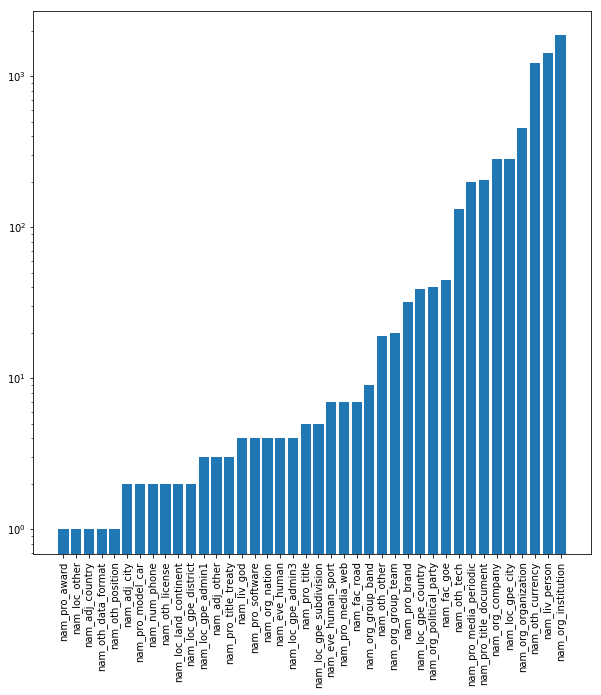

In [9]:
plt.rcParams['figure.figsize'] = [10, 10]
plot_counter(occurences)

In [10]:
def gen_label(tup):
    return "_".join(tup[0].split("_", 2)[:2])

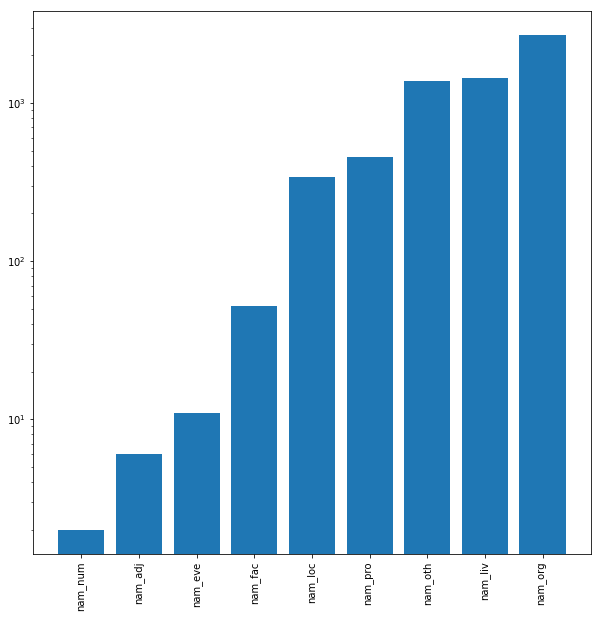

In [11]:
occurences_general = Counter(map(gen_label, entities))
plot_counter(occurences_general)

In [12]:
Counter(entities).most_common(100)

[(('nam_oth_currency', 'zł'), 1017),
 (('nam_oth_currency', 'złotych'), 188),
 (('nam_org_institution', 'Sądu Najwyższego'), 178),
 (('nam_pro_media_periodic', 'Dz . U .'), 177),
 (('nam_org_institution', 'Sąd Okręgowy'), 145),
 (('nam_org_institution', 'Sąd Rejonowy'), 128),
 (('nam_liv_person', 'M'), 89),
 (('nam_liv_person', 'J . D'), 81),
 (('nam_org_institution', 'Skarbu Państwa'), 74),
 (('nam_org_institution', 'Sąd Najwyższy'), 73),
 (('nam_liv_person', 'S . P'), 67),
 (('nam_org_organization', 'ZUS'), 64),
 (('nam_org_organization', 'M'), 58),
 (('nam_org_institution', 'Sądu Rejonowego'), 51),
 (('nam_oth_tech', 'VAT'), 47),
 (('nam_org_institution', 'Sądu Okręgowego'), 47),
 (('nam_loc_gpe_city', 'Szczecinie'), 46),
 (('nam_org_institution', 'IMIENIU RZECZYPOSPOLITEJ POLSKIEJ Dnia'), 44),
 (('nam_liv_person', 'M . B'), 44),
 (('nam_liv_person', 'M . G'), 42),
 (('nam_org_institution', 'Skarb Państwa'), 39),
 (('nam_liv_person', 'D'), 38),
 (('nam_org_organization', 'D'), 38),


In [16]:
occurences = Counter((map(lambda tup: (gen_label(tup), tup[1]), entities)))
sorter = lambda tup: tup[0][0]
grs = groupby(sorted(occurences.most_common(), key=sorter), key=sorter)
for k, g in grs:
    print()
    print(k)
    for x in sorted(list(g), key=itemgetter(1), reverse=True)[:10]:
        print("{} \t: {}".format(x[1],x[0][1]))


nam_adj
1 	: lekkiego
1 	: rodzicielskiego
1 	: unijnego
1 	: rosyjskim
1 	: unijnymi
1 	: unijnych

nam_eve
2 	: EURO 2012
1 	: Mistrzostwach Europy
1 	: Mistrzostwach Świata
1 	: Przedsiębiorstwie Budownictwa
1 	: Przedsiębiorstwie Usług
1 	: Spółdzielni Mieszkaniowej nad D
1 	: X P 51
1 	: Kp
1 	: Euro 95
1 	: Spółdzielni Mieszkaniowej w N

nam_fac
9 	: Straży Miejskiej W .
4 	: M
3 	: Spółdzielni Mieszkaniowej
3 	: Laboratorium Kryminalistycznego
3 	: Wojewódzkiego Szpitala w P
2 	: Szpitalu im . w Ł
2 	: Krajowego Rejestru Sądowego
2 	: Straży Miejskiej
2 	: Krajowego Rejestru Karnego
1 	: Zakładzie

nam_liv
89 	: M
81 	: J . D
67 	: S . P
44 	: M . B
42 	: M . G
38 	: D
36 	: M . S
35 	: M . D
34 	: B . M
31 	: G . D

nam_loc
46 	: Szczecinie
30 	: Centrum
15 	: Warszawie
11 	: Olsztynie
10 	: Łodzi
8 	: Hiszpanii
7 	: Gdyni
7 	: Warszawa
7 	: Piszu
7 	: Śródmieścia

nam_num
2 	: 112

nam_org
178 	: Sądu Najwyższego
145 	: Sąd Okręgowy
131 	: ZUS
128 	: Sąd Rejonowy
83 	: M
74 	